## Boston Regional Climate Data

In [79]:
import pandas as pd
import matplotlib as plt

In [80]:
# load station ID and location data
Stn_data = pd.read_csv("../data/NOAA_orignal_data/ghcnd-stations_noaa.csv", sep=',', header=None)
Stn_data.columns = ["STN_ID", "LAT", "LONG", "ELEV", "STATE", "NAME"]
Stn_data

,STN_ID,LAT,LONG,ELEV,STATE,NAME
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL
...,...,...,...,...,...,...
115077,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON
115078,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO
115079,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE
115080,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE


In [81]:
# Select all stations in the state MA
Stn_data_MA = Stn_data[Stn_data['STATE'] == 'MA']
Stn_data_MA

,STN_ID,LAT,LONG,ELEV,STATE,NAME
67648,US1MABA0001,41.6818,-70.2048,12.5,MA,YARMOUTH 2.3 SSE
67649,US1MABA0002,41.5871,-70.6321,18.3,MA,FALMOUTH 3.1 NNW
67650,US1MABA0003,41.5531,-70.5504,2.4,MA,FALMOUTH 3.0 E
67651,US1MABA0004,41.7135,-70.4723,50.0,MA,SANDWICH 3.4 SSE
67652,US1MABA0007,41.9260,-69.9764,22.3,MA,WELLFLEET 3.0 E
...,...,...,...,...,...,...
114221,USW00094720,41.6686,-70.2800,16.8,MA,HYANNIS BARNSTABLE MUNI AP
114222,USW00094723,42.7172,-71.1239,45.4,MA,LAWRENCE MUNI AP
114223,USW00094724,41.3931,-70.6150,20.7,MA,VINEYARD HAVEN AP
114225,USW00094726,41.6764,-70.9583,24.4,MA,NEW BEDFORD MUNI AP


In [82]:
# export MA station data as csv file
#Stn_data_MA.to_csv("../data/NOAA_orignal_data/ghcnd-stations_noaa_MA.csv",index=False, header =True, sep=',')

**Data processing in ArcGIS**

The "ghcnd-stations_noaa_MA.csv" was imported in ArcGIS Pro. A point shape file was created using "XY to points" tool. The point shapefile was then clipped using the north and south catchment area polygons (dissolved). This catchment area polygon shapefile was then spatial joined to the clipped station shapefile. The table of the output file was then exported for further use in this notebook in the following steps.

**Join Boston regional dail temperature data and station data**

In [83]:
# Load station data from GIS processing
carea_Stn_data = pd.read_csv("../data/NOAA_orignal_data/MA_Stn_points_catchment.csv", sep=',')
carea_Stn_data

,STN_ID,LAT,LONG,ELEV,STATE,NAME,Loc
0,US1MAMD0006,42.4318,-71.1716,88.4,MA,ARLINGTON 1.0 NNW,NORTH
1,US1MAMD0007,42.4459,-71.1358,13.7,MA,WINCHESTER 0.7 SE,NORTH
2,US1MAMD0008,42.4424,-71.0529,36.3,MA,MELROSE 0.9 SSE,NORTH
3,US1MAMD0011,42.3876,-71.1253,14.6,MA,CAMBRIDGE 0.9 NNW,NORTH
4,US1MAMD0018,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH
...,...,...,...,...,...,...,...
92,USW00014739,42.3606,-71.0106,3.7,MA,BOSTON LOGAN INTL AP,NORTH
93,USW00014753,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH
94,USW00014789,42.2667,-71.0333,4.9,MA,SQUANTUM NAS,SOUTH
95,USW00054704,42.1908,-71.1736,15.2,MA,NORWOOD MEM AP,SOUTH


In [84]:
# Load station data from GIS processing
boston_clim_data = pd.read_csv("../data/NOAA_orignal_data/Boston_Region_Clim_Data.csv", sep=',')
boston_clim_data

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21202,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/26/2020,0.00,NaN,74.0,59.0
21203,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/27/2020,0.14,NaN,67.0,53.0
21204,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/28/2020,0.00,NaN,80.0,58.0
21205,USW00094723,"LAWRENCE MUNICIPAL AIRPORT, MA US",8/29/2020,0.54,NaN,75.0,61.0


In [85]:
# Join station data to daily temperature data
## rename station data column
carea_Stn_data = carea_Stn_data.rename(columns={'STN_ID': 'STATION', 'Loc' : 'LOC'})
carea_Stn_data.columns

Index(['STATION', 'LAT', 'LONG', 'ELEV', 'STATE', 'NAME', 'LOC'], dtype='object')

In [86]:
inner_merge_Stn_clim = pd.merge(boston_clim_data, carea_Stn_data, on='STATION', how='inner')
inner_merge_Stn_clim

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/15/2020,0.07,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH
7063,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/16/2020,0.77,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH
7064,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/17/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH
7065,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/18/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH


In [87]:
# Add a new column with Date in date-time format
inner_merge_Stn_clim['DATE_CONV'] = pd.to_datetime(inner_merge_Stn_clim['DATE'], infer_datetime_format=True)
inner_merge_Stn_clim

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC,DATE_CONV
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-03
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-04
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-05
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-06
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/15/2020,0.07,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-15
7063,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/16/2020,0.77,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-16
7064,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/17/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-17
7065,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/18/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-18


In [88]:
# Separate data for north and south catchment area
## extract north catchment area data
c_area_clim_north = inner_merge_Stn_clim.loc[inner_merge_Stn_clim['LOC'] == 'NORTH']
c_area_clim_north

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC,DATE_CONV
207,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/28/2020,0.00,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-28
208,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/29/2020,0.29,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-29
209,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/30/2020,0.57,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-30
210,US1MAMD0018,"BELMONT 0.2 ESE, MA US",3/31/2020,0.17,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-03-31
211,US1MAMD0018,"BELMONT 0.2 ESE, MA US",4/1/2020,0.00,NaN,NaN,NaN,42.3988,-71.1638,4.3,MA,BELMONT 0.2 ESE,NORTH,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/15/2020,0.07,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-15
7063,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/16/2020,0.77,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-16
7064,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/17/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-17
7065,US1MAMD0152,"MEDFORD 0.6 W, MA US",5/18/2020,0.00,NaN,NaN,NaN,42.4220,-71.1205,6.1,MA,MEDFORD 0.6 W,NORTH,2020-05-18


In [89]:
## extract south catchment area data
c_area_clim_south = inner_merge_Stn_clim.loc[inner_merge_Stn_clim['LOC'] == 'SOUTH']
c_area_clim_south

,STATION,NAME_x,DATE,PRCP,TAVG,TMAX,TMIN,LAT,LONG,ELEV,STATE,NAME_y,LOC,DATE_CONV
0,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/3/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-03
1,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/4/2020,0.09,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-04
2,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/5/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-05
3,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/6/2020,0.00,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-06
4,US1MANF0039,"WEYMOUTH 2.3 N, MA US",3/7/2020,0.07,NaN,NaN,NaN,42.2433,-70.9548,15.8,MA,WEYMOUTH 2.3 N,SOUTH,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,USW00014753,"BLUE HILL LCD, MA US",6/26/2020,0.02,NaN,83.0,65.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-26
6693,USW00014753,"BLUE HILL LCD, MA US",6/27/2020,0.05,NaN,82.0,65.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-27
6694,USW00014753,"BLUE HILL LCD, MA US",6/28/2020,3.27,NaN,84.0,62.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-28
6695,USW00014753,"BLUE HILL LCD, MA US",6/29/2020,1.46,NaN,71.0,61.0,42.2122,-71.1136,190.5,MA,BLUE HILL,SOUTH,2020-06-29


In [90]:
# Group by DATE_CONV and calculate mean precipitation
## north catchment area daily mean data
c_area_clim_north_dmean = c_area_clim_north.groupby(['DATE_CONV'])[['PRCP','TMAX', 'TMIN']].mean()
c_area_clim_north_dmean

,PRCP,TMAX,TMIN
DATE_CONV,,,
2020-01-01,0.018125,41.0,34.0
2020-01-02,0.000000,47.5,31.5
2020-01-03,0.000000,50.0,40.0
2020-01-04,0.014667,45.5,38.5
2020-01-05,0.230000,39.5,27.5
...,...,...,...
2020-08-28,0.151333,82.5,60.0
2020-08-29,0.029333,77.0,62.0
2020-08-30,0.258750,77.0,57.0


In [91]:
### Calculate daily average temperature from TMIN and TMAX
c_area_clim_north_dmean['TAVG_cal'] = c_area_clim_north_dmean[['TMAX', 'TMIN']].mean(axis=1)
c_area_clim_north_dmean

,PRCP,TMAX,TMIN,TAVG_cal
DATE_CONV,,,,
2020-01-01,0.018125,41.0,34.0,37.50
2020-01-02,0.000000,47.5,31.5,39.50
2020-01-03,0.000000,50.0,40.0,45.00
2020-01-04,0.014667,45.5,38.5,42.00
2020-01-05,0.230000,39.5,27.5,33.50
...,...,...,...,...
2020-08-28,0.151333,82.5,60.0,71.25
2020-08-29,0.029333,77.0,62.0,69.50
2020-08-30,0.258750,77.0,57.0,67.00


In [92]:
# Group by DATE_CONV and calculate mean precipitation
## south catchment area daily mean data
c_area_clim_south_dmean = c_area_clim_south.groupby(['DATE_CONV'])[['PRCP','TMAX', 'TMIN']].mean()
c_area_clim_south_dmean

,PRCP,TMAX,TMIN
DATE_CONV,,,
2020-01-01,0.013077,40.500000,31.333333
2020-01-02,0.000000,44.833333,28.500000
2020-01-03,0.000000,48.000000,36.166667
2020-01-04,0.036923,46.833333,40.333333
2020-01-05,0.268462,42.166667,29.833333
...,...,...,...
2020-08-28,0.285833,76.400000,59.800000
2020-08-29,0.025000,78.800000,61.000000
2020-08-30,0.133846,77.400000,59.200000


In [93]:
### Calculate daily average temperature from TMIN and TMAX
c_area_clim_south_dmean['TAVG_cal'] = c_area_clim_south_dmean[['TMAX', 'TMIN']].mean(axis=1)
c_area_clim_south_dmean

,PRCP,TMAX,TMIN,TAVG_cal
DATE_CONV,,,,
2020-01-01,0.013077,40.500000,31.333333,35.916667
2020-01-02,0.000000,44.833333,28.500000,36.666667
2020-01-03,0.000000,48.000000,36.166667,42.083333
2020-01-04,0.036923,46.833333,40.333333,43.583333
2020-01-05,0.268462,42.166667,29.833333,36.000000
...,...,...,...,...
2020-08-28,0.285833,76.400000,59.800000,68.100000
2020-08-29,0.025000,78.800000,61.000000,69.900000
2020-08-30,0.133846,77.400000,59.200000,68.300000


In [94]:
#export data
#c_area_clim_south_dmean.to_csv("../data/final_south_daily_mean_noaa.csv",index=True, header =True, sep=',')
#c_area_clim_north_dmean.to_csv("../data/final_north_daily_mean_noaa.csv",index=True, header =True, sep=',')

<AxesSubplot:xlabel='DATE_CONV'>

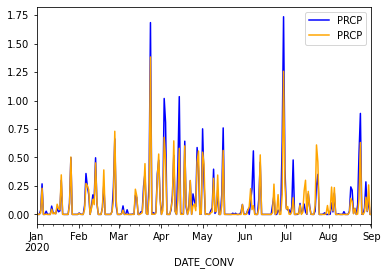

In [95]:
# ploting precipitation for north and south catchment area 
ax = c_area_clim_south_dmean.plot(y='PRCP', color = 'blue')
c_area_clim_north_dmean.plot(ax=ax, color = 'orange', y='PRCP')


<AxesSubplot:xlabel='DATE_CONV'>

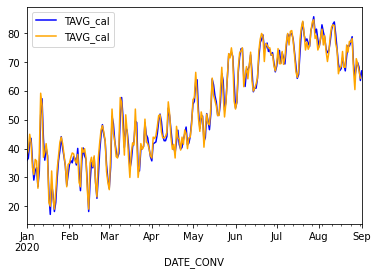

In [96]:
# ploting calculated average temperature for north and south catchment area
ax = c_area_clim_south_dmean.plot(y='TAVG_cal', color = 'blue')
c_area_clim_north_dmean.plot(ax=ax, color = 'orange', y='TAVG_cal')